In [1]:
import json
import pandas as pd
df = pd.read_json(r'C:/Users/jefil/Downloads/Musical_Instruments_5.json',lines = True) 

In [2]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [3]:
import re
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)# removed @mentions
    text = re.sub(r'#','',text)# removing the # symbol
    text = re.sub(r'RT[\s]+','',text)#removing RT
    text = re.sub(r'https?:\/\/\S+','',text)#removing the hyper link
    return text 

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()

def preprocessing(col):
    
    # lowercasing
    df[col] = df[col].str.lower()

    # Remove punctuation
    df[col] = df[col].str.replace('[^\w\s]','', regex=True)
    
    #Lemmatization
    df[col] = df[col].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    #Removing stopwords
    stop = stopwords.words('english')
    df[col] = df[col].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop)]))

preprocessing('reviewText')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jefil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
def product_ratings(x):
    if x['overall'] == 5 or x['overall'] == 4:
        x['ratings'] = 'Positive'
    elif x['overall'] == 3:
        x['ratings'] = 'Neutral'
    elif x['overall'] == 2 or x['overall'] == 1:
        x['ratings'] = 'Negative'
    return x

df = df.apply(product_ratings, axis = 1)
df['ratings'].value_counts()

Positive    9022
Neutral      772
Negative     467
Name: ratings, dtype: int64

In [6]:
df['reviewText'] = df['reviewText'].apply(cleanText)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,ratings
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write doe exactly supposed filter pop sou...,5,good,1393545600,"02 28, 2014",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product doe exactly quite affordablei realized...,5,Jake,1363392000,"03 16, 2013",Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5,It Does The Job Well,1377648000,"08 28, 2013",Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pop ...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great look performs like studio fil...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive
...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",great expected thank,5,Five Stars,1405814400,"07 20, 2014",Positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",ive thinking trying nanoweb string wa bit put ...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",tried coated string past including elixir neve...,4,Good for coated.,1405987200,"07 22, 2014",Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",well made elixir developed taylor guitar strin...,4,Taylor Made,1404172800,"07 1, 2014",Positive


In [7]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['subjectivity'] = df['reviewText'].apply(getSubjectivity)
df['polarity'] = df['reviewText'].apply(getPolarity)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,ratings,subjectivity,polarity
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write doe exactly supposed filter pop sou...,5,good,1393545600,"02 28, 2014",Positive,0.433333,0.340000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product doe exactly quite affordablei realized...,5,Jake,1363392000,"03 16, 2013",Positive,0.292857,0.014286
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5,It Does The Job Well,1377648000,"08 28, 2013",Positive,0.434286,0.167500
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pop ...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive,0.875000,0.333333
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great look performs like studio fil...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive,0.750000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",great expected thank,5,Five Stars,1405814400,"07 20, 2014",Positive,0.575000,0.350000
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",ive thinking trying nanoweb string wa bit put ...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",Positive,0.482445,0.174167
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",tried coated string past including elixir neve...,4,Good for coated.,1405987200,"07 22, 2014",Positive,0.446027,0.212637
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",well made elixir developed taylor guitar strin...,4,Taylor Made,1404172800,"07 1, 2014",Positive,0.527250,0.177974


In [8]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['polarity'].apply(getAnalysis)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,ratings,subjectivity,polarity,Analysis
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",much write doe exactly supposed filter pop sou...,5,good,1393545600,"02 28, 2014",Positive,0.433333,0.340000,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",product doe exactly quite affordablei realized...,5,Jake,1363392000,"03 16, 2013",Positive,0.292857,0.014286,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",primary job device block breath would otherwis...,5,It Does The Job Well,1377648000,"08 28, 2013",Positive,0.434286,0.167500,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",nice windscreen protects mxl mic prevents pop ...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive,0.875000,0.333333,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",pop filter great look performs like studio fil...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive,0.750000,0.800000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]",great expected thank,5,Five Stars,1405814400,"07 20, 2014",Positive,0.575000,0.350000,Positive
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",ive thinking trying nanoweb string wa bit put ...,5,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014",Positive,0.482445,0.174167,Positive
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",tried coated string past including elixir neve...,4,Good for coated.,1405987200,"07 22, 2014",Positive,0.446027,0.212637,Positive
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]",well made elixir developed taylor guitar strin...,4,Taylor Made,1404172800,"07 1, 2014",Positive,0.527250,0.177974,Positive


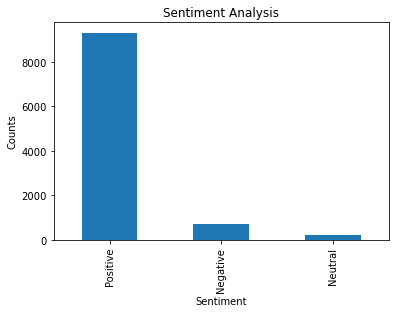

In [9]:
import matplotlib.pyplot as plt
df['Analysis'].value_counts()

#plot and visualizing the count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy: ",accuracy_score(df["ratings"],df["Analysis"]))
print("Precision score:", precision_score(df["ratings"],df["Analysis"], average='macro'))
print("Recall score:", recall_score(df["ratings"],df["Analysis"], average='micro'))
print("F1 score: ",f1_score(df["ratings"],df["Analysis"], average='macro')) 

Accuracy:  0.8240912191794172
Precision score: 0.3775572963611052
Recall score: 0.8240912191794172
F1 score:  0.37852716302438466
